# Part 1: Least Squares

In this notebook, I analyze the Student Performance dataset and compare two Linear Regression models: one custom-built from scratch and the other from scikit-learn. In Part 2, I will implement Gradient Descent from scratch. Since I'll be using the same dataset, I won't repeat the dataset analysis in the next part.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from Linear_Regression.models.linear_regression import LinearRegression as LR
from Linear_Regression.models.regression_metrics import RegressionMetrics
from Linear_Regression.models.standard_scaler import StandardScaler as SC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Set the style and display options

In [2]:
style.use("dark_background")
pd.set_option("display.max_columns", 20)
pd.set_option("expand_frame_repr", False)

## Load and inspect the dataset

In [3]:
df = pd.read_csv("../data/Student_Performance.csv")

print(df.head())
print(df.info())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  Sample Question Papers Practiced  Performance Index
0              7               99                        Yes            9                                 1               91.0
1              4               82                         No            4                                 2               65.0
2              8               51                        Yes            7                                 2               45.0
3              5               52                        Yes            5                                 2               36.0
4              7               75                         No            8                                 5               66.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   

## Distribution of student performance data

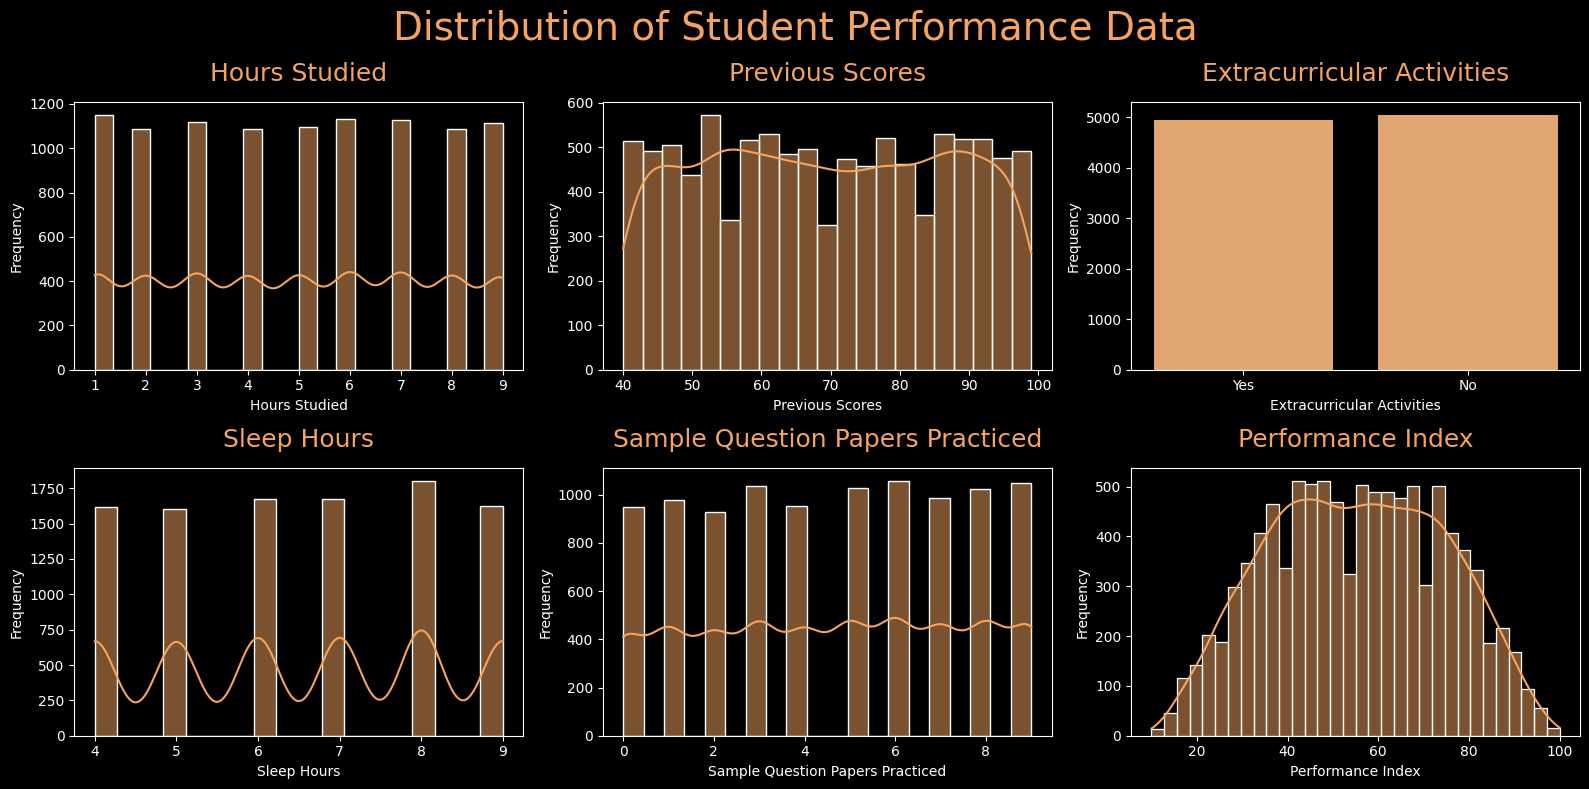

In [4]:
plt.figure(figsize=(16,8))

numeric_columns = df.select_dtypes(include=["number"]).columns

plt.suptitle("Distribution of Student Performance Data", color="sandybrown", fontsize=28)

for index, column in enumerate(df.columns):
    plt.subplot(2,3,index+1)

    if column in numeric_columns:
        sns.histplot(data=df, x=column, color="sandybrown", kde=True)
    else:
        sns.countplot(data=df, x=column, color="sandybrown")

    plt.title(column, fontdict={"fontsize": 18, "color": "sandybrown"}, pad=15)
    plt.xlabel(xlabel=column, fontsize=10)
    plt.ylabel(ylabel="Frequency", fontsize=10)
    plt.tight_layout()

## Feature vs Performance Index

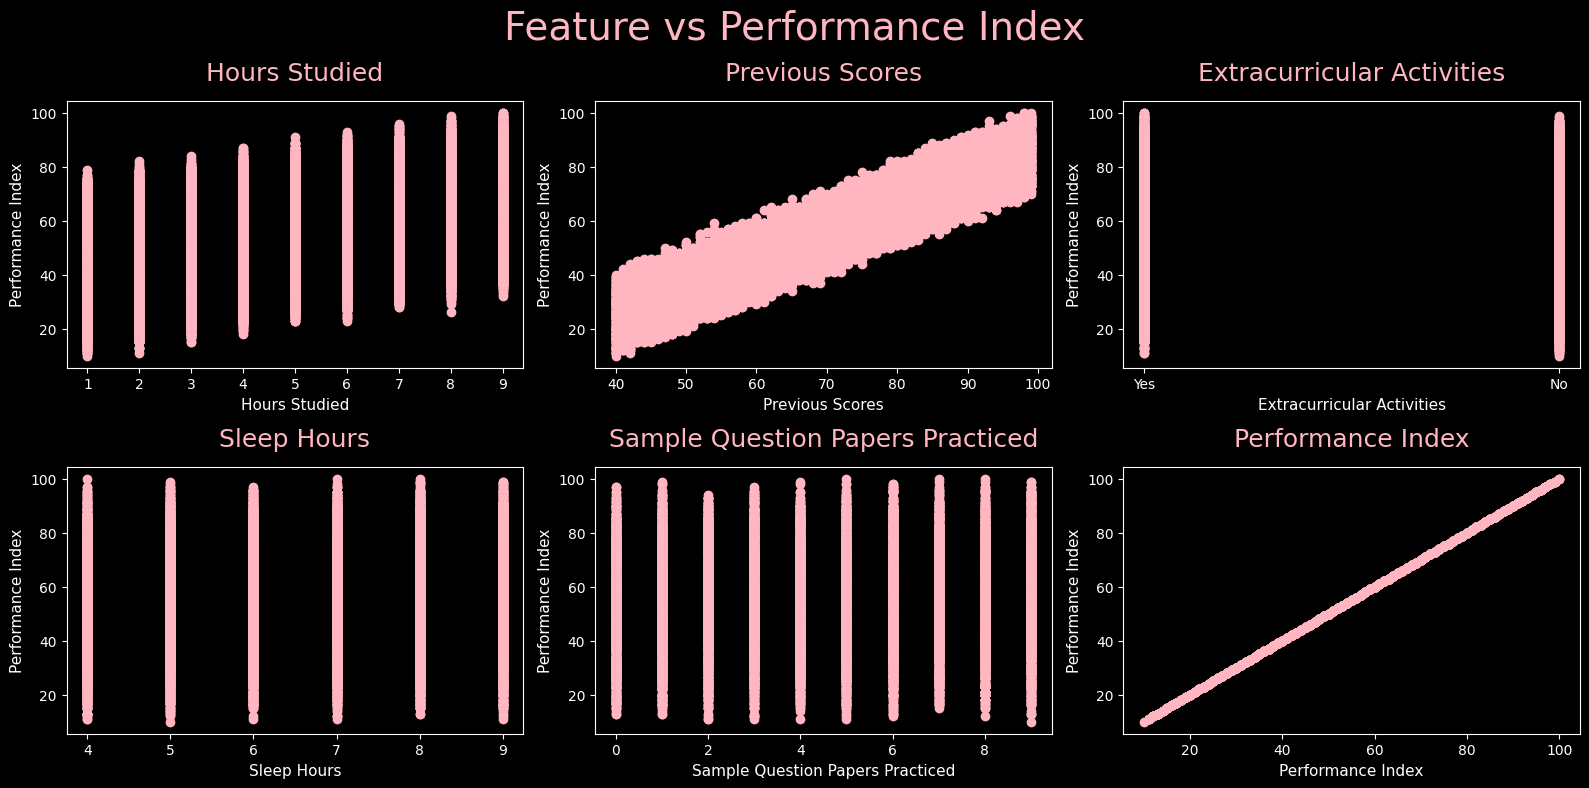

In [5]:
plt.figure(figsize=(16,8))

plt.suptitle("Feature vs Performance Index", fontsize=28, color="lightpink")

for index, column in enumerate(df.columns):
    plt.subplot(2,3,index+1)
    plt.scatter(df[column], df["Performance Index"], color="lightpink")
    plt.title(column, fontsize=18, color="lightpink", pad=15)
    plt.xlabel(xlabel=column, fontsize=11)
    plt.ylabel(ylabel="Performance Index", fontsize=11)
    plt.tight_layout()

## Correlation between features and Performance Index

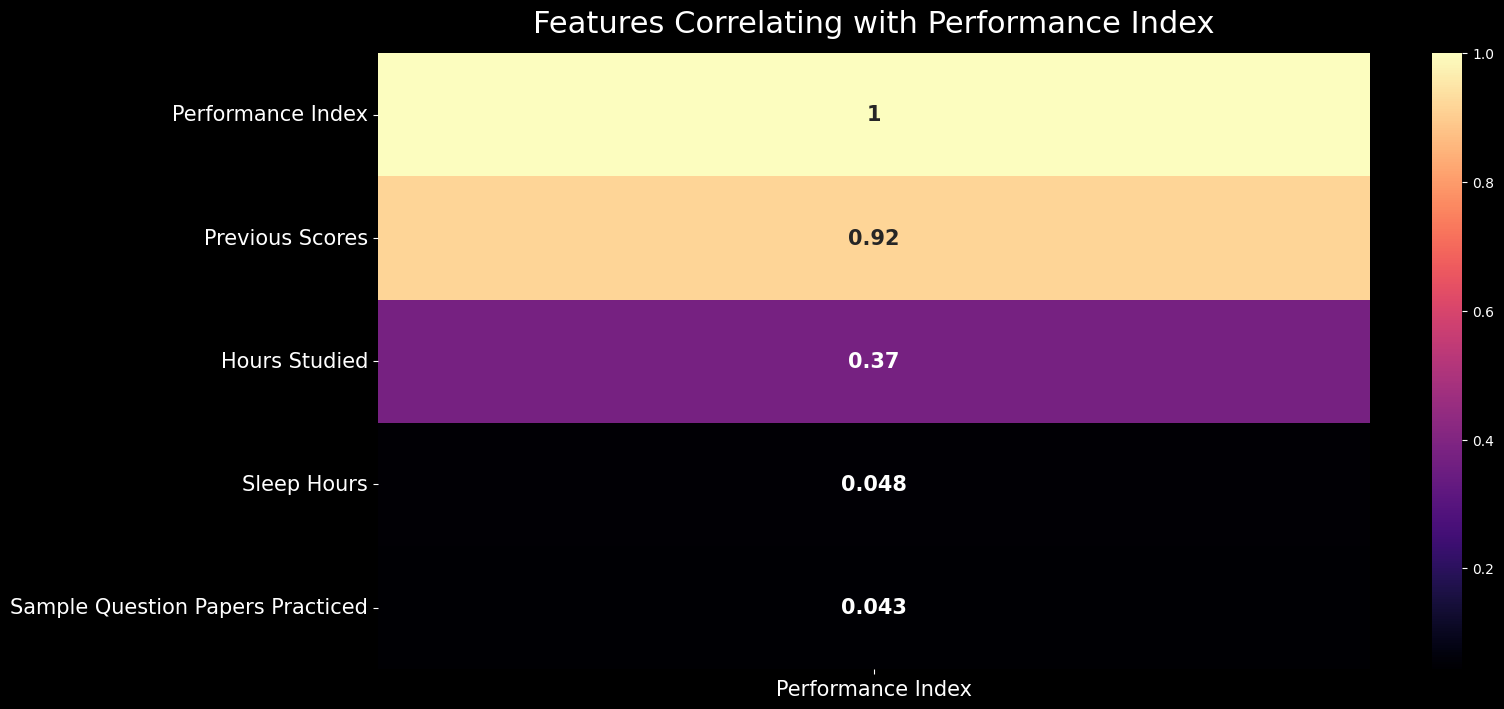

In [6]:
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(df[numeric_columns].corr()[["Performance Index"]].sort_values(by="Performance Index", ascending=False), 
                      annot=True, annot_kws={"fontsize":15, "weight": "bold"}, cmap="magma")
heatmap.set_title("Features Correlating with Performance Index", fontdict={"fontsize": 22}, pad=15)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15);

**Previous Scores** has the highest correlation to the **Performance Index**. **Hours Studied** is slightly correlated to the target variable too.

## Convert categorical variable to dummy variable

In [7]:
Extracurricular_Activities_Yes = pd.get_dummies(df["Extracurricular Activities"], drop_first=True)
df["Extracurricular Activities"] = Extracurricular_Activities_Yes
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  Sample Question Papers Practiced  Performance Index
0              7               99                        True            9                                 1               91.0
1              4               82                       False            4                                 2               65.0
2              8               51                        True            7                                 2               45.0
3              5               52                        True            5                                 2               36.0
4              7               75                       False            8                                 5               66.0


## Split the data into features and target variable

In [8]:
X = df.drop(columns=["Performance Index"]).values
y= df["Performance Index"].values

print(f"X:    {X}\n")
print("-----------------------\n")
print(f"y:    {y}")

X:    [[7 99 True 9 1]
 [4 82 False 4 2]
 [8 51 True 7 2]
 ...
 [6 83 True 8 5]
 [9 97 True 7 0]
 [7 74 False 8 1]]

-----------------------

y:    [91. 65. 45. ... 74. 95. 64.]


## Split the data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the features using custom and sklearn scalers

In [10]:
sc_sklearn = StandardScaler()
sc_custom = SC()

X_train_sklearn = sc_sklearn.fit_transform(X=X_train)
X_train_custom = sc_custom.fit_transform(X=X_train)

X_test_sklearn = sc_sklearn.transform(X=X_test)
X_test_custom = sc_custom.transform(X=X_test)

In [11]:
print("X_train_custom == X_train_sklearn:\n")
print(X_train_custom == X_train_sklearn)
print("\n--------------------------\n")
print("X_test_custom == X_test_sklearn:\n")
print(X_test_custom == X_test_sklearn)

X_train_custom == X_train_sklearn:

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 ...
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]

--------------------------

X_test_custom == X_test_sklearn:

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 ...
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


## Fit the custom and sklearn linear regression models

In [12]:
lr_custom = LR()
lr_custom.fit(X_train=X_train_custom, y_train=y_train)
y_pred_custom = lr_custom.predict(X_test=X_test_custom)

In [13]:
lr_sklearn = LinearRegression()
lr_sklearn.fit(X=X_train_sklearn, y=y_train)
y_pred_sklearn = lr_sklearn.predict(X=X_test_sklearn)

## Create Models dictionary for custom and sklearn models

In [14]:
models = [{
    "y_pred": y_pred_custom,
    "color_title": "sandybrown",
    "label": "Custom",
    "edgecolors": "yellow",
    "linecolor": "chocolate"
},
{
    "y_pred": y_pred_sklearn,
    "color_title": "lightpink",
    "label": "Sklearn",
    "edgecolors": "magenta",
    "linecolor": "darkmagenta"
},
]

## Evaluate the models using custom metrics

In [15]:
RegressionMetrics.metrics_dataframe(y_true=y_test, y_pred=y_pred_custom)

,MSE,RMSE,MAE,R2
0,4.08,2.02,1.61,0.99


In [16]:
RegressionMetrics.metrics_dataframe(y_true=y_test, y_pred=y_pred_sklearn)

,MSE,RMSE,MAE,R2
0,4.08,2.02,1.61,0.99


## Evaluate the models using sklearn metrics

In [17]:
for model in models:
    model["mse"] = mean_squared_error(y_true=y_test, y_pred=model["y_pred"])
    model["rmse"] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model["y_pred"]))
    model["mae"] = mean_absolute_error(y_true=y_test, y_pred=model["y_pred"])
    model["r2"] = r2_score(y_true=y_test, y_pred=model["y_pred"])

    print()
    print(f"{model["label"]} LR")
    print("--------------\n")
    print(f"MSE:     {round(model["mse"],2)}")
    print(f"RMSE:    {round(model["rmse"],2)}")
    print(f"MAE:     {round(model["mae"],2)}")
    print(f"R2:      {round(model["r2"],2)}")


Custom LR
--------------

MSE:     4.08
RMSE:    2.02
MAE:     1.61
R2:      0.99

Sklearn LR
--------------

MSE:     4.08
RMSE:    2.02
MAE:     1.61
R2:      0.99


## Plot predictions vs true values for custom and sklearn models

This plot helps to visualize how well the model's predictions match the actual values. 
Ideally, the points should be close to a 45-degree line passing through the origin (y = x line), 
which would indicate perfect predictions. Deviations from this line indicate errors in the predictions.

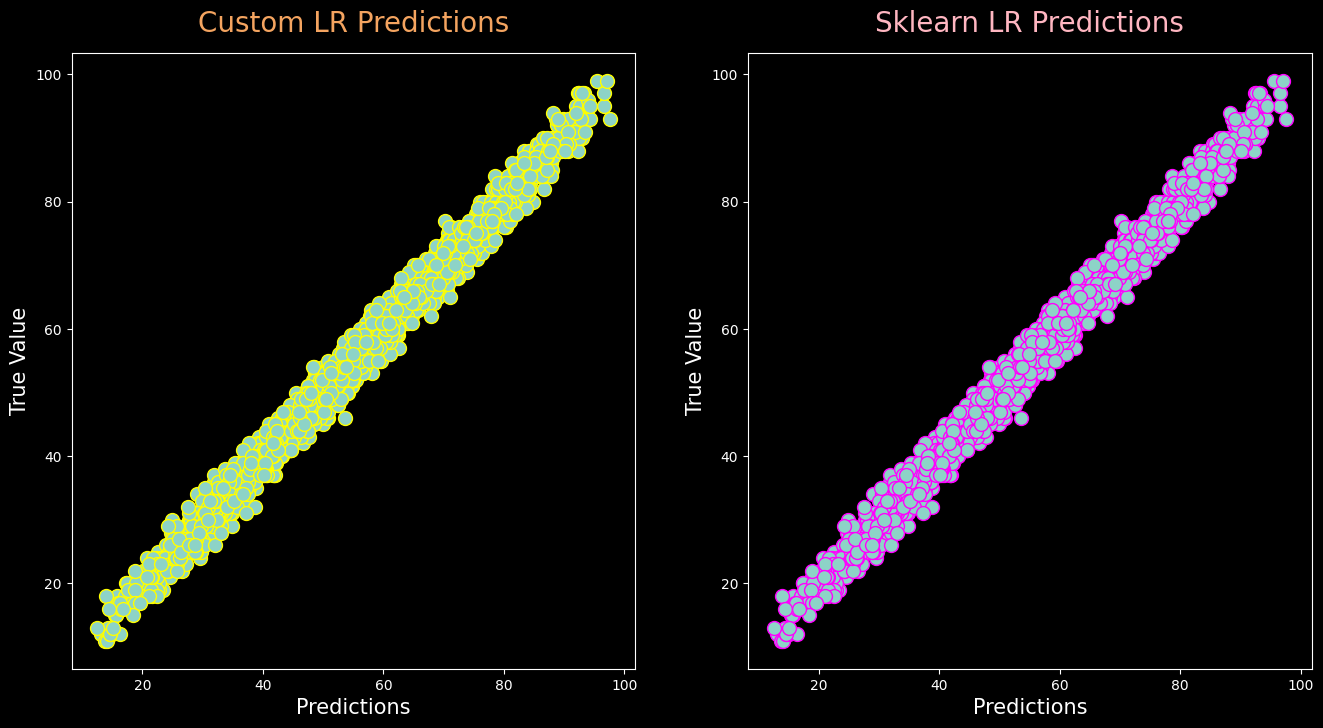

In [18]:
plt.figure(figsize=(16,8))

for index, model in enumerate(models):
    plt.subplot(1, 2, index+1)
    plt.scatter(model["y_pred"], y_test, marker="o", edgecolors=model["edgecolors"], s=100)
    plt.title(label=model["label"] + " LR Predictions", fontdict={"color": model["color_title"], "fontsize": 20}, pad=15)
    plt.xlabel(xlabel="Predictions", fontsize=15)
    plt.ylabel(ylabel="True Value", fontsize=15)

## Linear Regression Assumptions

### Linearity
If the residuals are randomly scattered around the horizontal line (y=0) with no distinct patterns, this suggests that the linearity assumption is likely satisfied.

### Homoscedasticity (Constant Residual Variance)

The residuals should have constant variance across all levels of the predicted values. 
This can be assessed by plotting residuals vs fitted values and looking for a 'funnel' shape.
If the residuals spread out as the fitted values increase, it indicates heteroscedasticity.

### No Autocorrelation (Independent Error Terms)

The residuals should not show any pattern or correlation over time. 
This assumption is especially important for time series data. 
The residuals plot should show no clear pattern if this assumption is met.

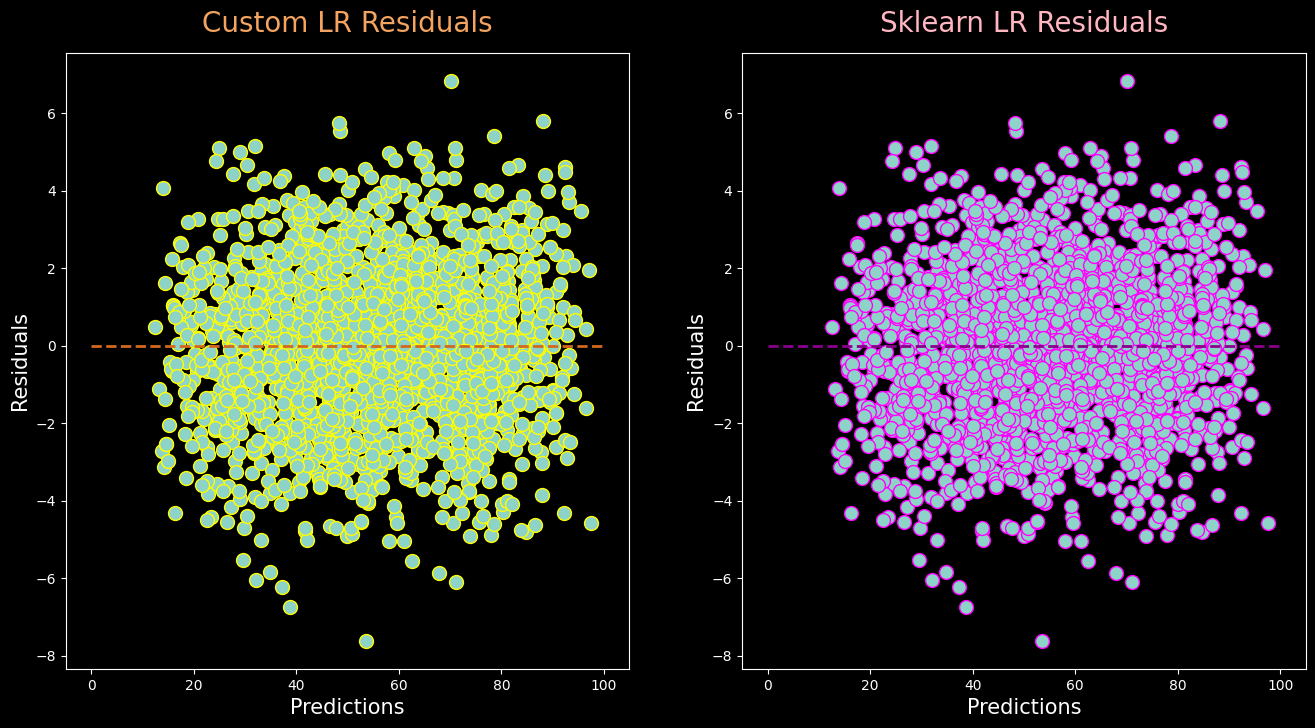

In [19]:
plt.figure(figsize=(16,8))

line = {
    "x": np.linspace(0,100,1000),
    "y": np.zeros(1000)
}

for index, model in enumerate(models):
    plt.subplot(1, 2, index+1)
    plt.scatter(x=model["y_pred"], y=y_test-model["y_pred"], marker="o", edgecolors=model["edgecolors"], s=100)
    plt.plot(line["x"], line["y"], ls="--", linewidth=2, color=model["linecolor"])
    plt.title(label=model["label"] + " LR Residuals", fontdict={"color": model["color_title"], "fontsize": 20}, pad=15)
    plt.xlabel(xlabel="Predictions", fontsize=15)
    plt.ylabel(ylabel="Residuals", fontsize=15)

### Normality of Errors

The residuals should be approximately normally distributed. 
This can be checked using a histogram of the residuals.

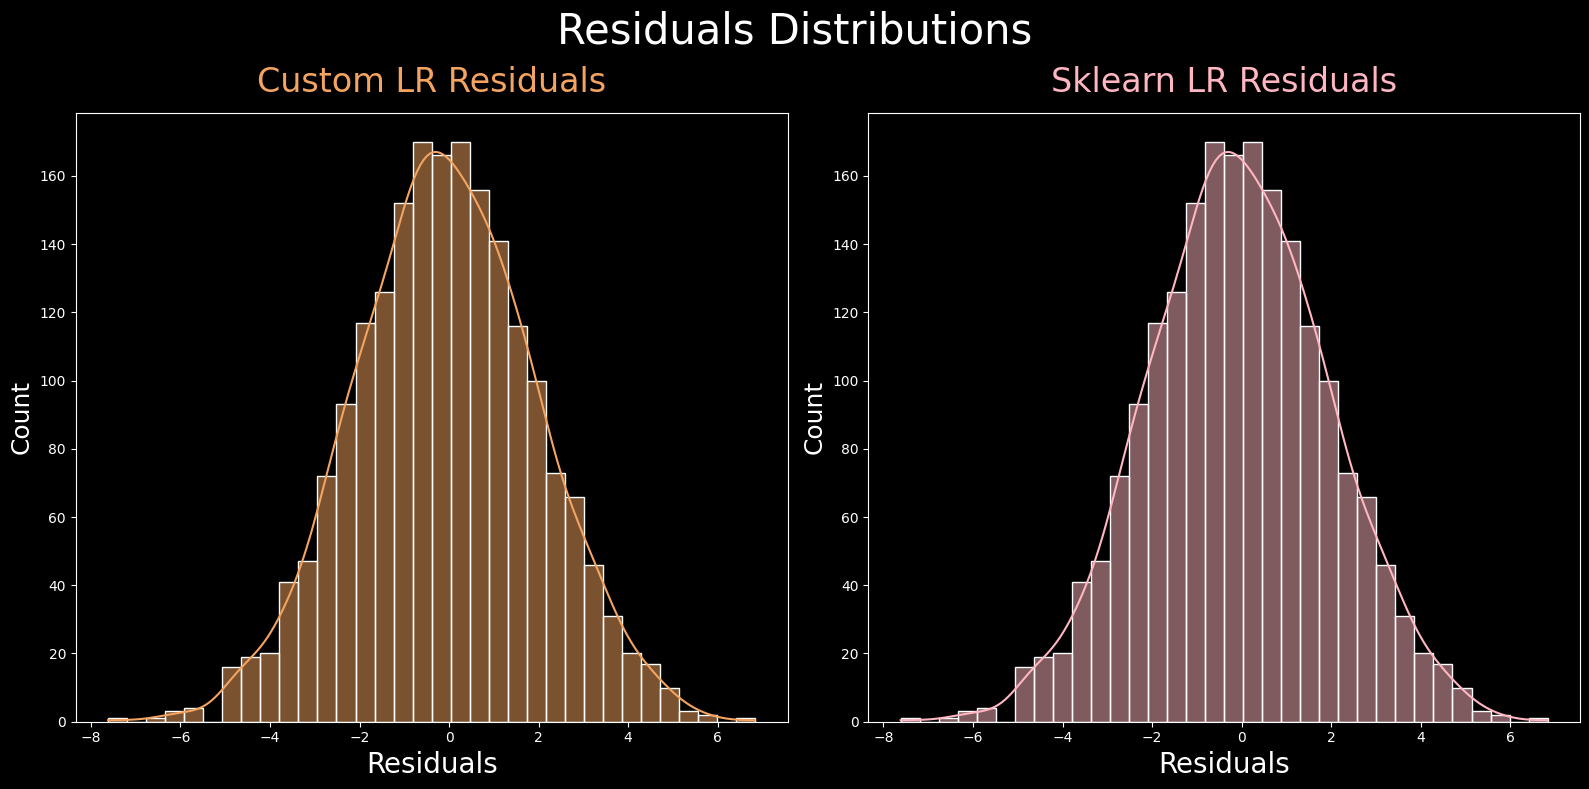

In [20]:
plt.figure(figsize=(16,8))

plt.suptitle("Residuals Distributions", fontsize=30)

for index, model in enumerate(models):
    plt.subplot(1,2,index+1)
    plt.title(f"{model["label"]} LR Residuals", fontdict={"color": model["color_title"], "fontsize": 24}, pad=15)
    sns.histplot(y_test - model["y_pred"], color=model["color_title"], kde=True)
    plt.xlabel(xlabel="Residuals", fontsize=20)
    plt.ylabel(ylabel="Count", fontsize=18)
    plt.tight_layout()

### No Multicollinearity

There is no multicollinearity between features.

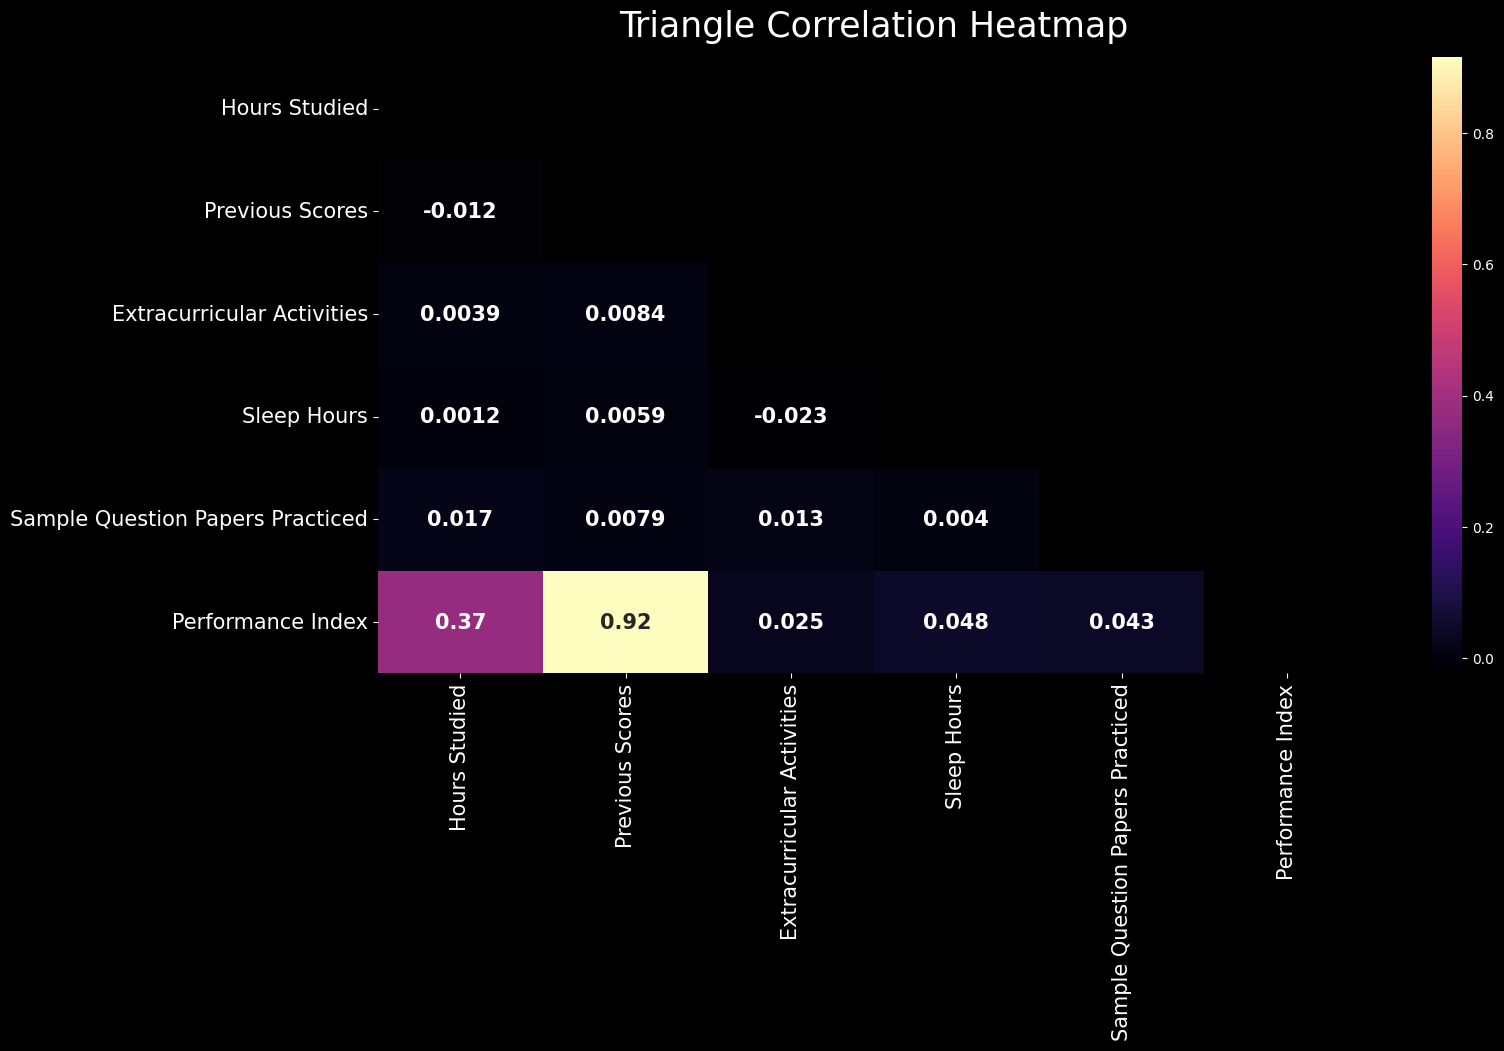

In [21]:
plt.figure(figsize=(16,8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"fontsize": 15, "weight": "bold"}, cmap="magma")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':25}, pad=15)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15);

## Conclusion

### Summary of Findings
In this analysis, we explored the dataset and evaluated the performance of both custom and sklearn linear regression models. 

### Model Performance
The custom model and the sklearn model were compared based on their performance metrics.

### Assumptions Check
- **Linearity**: The residuals were randomly scattered around the horizontal line, indicating that the linearity assumption is satisfied.
- **Homoscedasticity**: Residuals did not show any funnel shape, suggesting constant variance.
- **No Autocorrelation**: Residuals were independent and showed no clear pattern, meeting the no autocorrelation assumption.
- **Normality of Errors**: The histogram of residuals approximated a normal distribution.
- **No Multicollinearity**: The correlation heatmap indicated no significant multicollinearity between features.

### Model Suitability
Based on the performance metrics and assumption checks, both models are suitable for predicting student performance.

In [22]:
from Linear_Regression.models.gradient_descent import GradienDescent

gradient_descent_model = GradienDescent()

gradient_descent_model.fit(X_train=X_train_sklearn, y_train=y_train, learning_rate=0.01, iterations=1000)
y_pred = gradient_descent_model.predict(X_test=X_test_sklearn)
RegressionMetrics.print_metrics(y_true=y_test, y_pred=y_pred)

MSE:     4.08
RMSE:    2.02
MAE:     1.61
R2:      0.99
